In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importar el Data Set
dataSet = pd.read_csv("Salary_Data.csv")
dataSet.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, 1].values

In [5]:
print("type(X): ", type(X), ", Filas y Columnas X: ", X.shape, ", Filas de X: ", X.shape[0])
print("type(y): ", type(y), ", Filas y Columnas y: ", y.shape, ", Filas de y: ", y.shape[0])

type(X):  <class 'numpy.ndarray'> , Filas y Columnas X:  (30, 1) , Filas de X:  30
type(y):  <class 'numpy.ndarray'> , Filas y Columnas y:  (30,) , Filas de y:  30


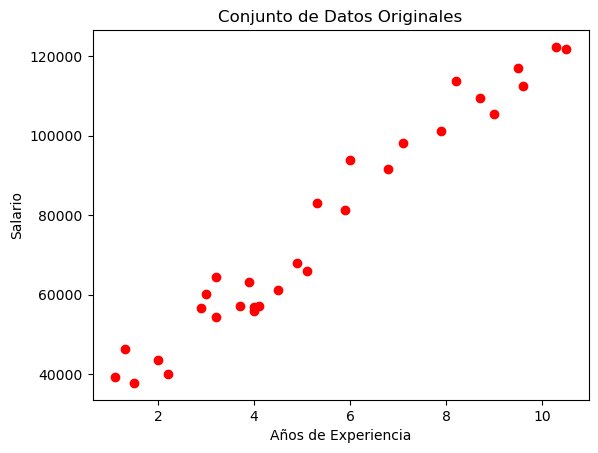

In [6]:
plt.scatter(X, y, color = "red")
plt.title("Conjunto de Datos Originales")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.show()

In [7]:
#Dividir el Data Set en Conjunto de Entrenamiento y Conjunto de Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [30]:
#Mostrar Datos de Entrenamiento
from IPython.display import display, HTML

display(HTML("""
<h2 style = "color:2E86C1; font-family:Arial;">🧾 Datos de Train</h2>
"""))

tabla = {
    "X_train": X_train.flatten(),
    "y_train": y_train
}
trainTable = pd.DataFrame(tabla)
print(trainTable.head())
print("Nueva Cantidad Filas: ", trainTable.shape[0])

   X_train   y_train
0      2.9   56642.0
1      5.1   66029.0
2      3.2   64445.0
3      4.5   61111.0
4      8.2  113812.0
Nueva Cantidad Filas:  20


In [29]:
#Mostrar Datos de Test

display(HTML("""
<h2 style = "color:2E86C1; font-family:Arial;">🧾 Datos de Test</h2>
"""))

tabla = {
    "X_test": X_test.flatten(),
    "y_test": y_test
}
trainTable = pd.DataFrame(tabla)
print(trainTable.head())
print("Nueva Cantidad Filas: ", trainTable.shape[0])

   X_test    y_test
0     1.5   37731.0
1    10.3  122391.0
2     4.1   57081.0
3     3.9   63218.0
4     9.5  116969.0
Nueva Cantidad Filas:  10


In [11]:
#Crear modelo de Regresion Lineal Simple con Conjunto de Entrenamiento
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
#Visualizar el modelo RLS que acabo de crear
from IPython.display import Markdown, display
b0 = regression.intercept_
b1 = regression.coef_[0]

display(HTML(f"""
<div style="text-align:center; font-family:Arial; margin-top:20px;">
    <h3 style="color:#154360; background-color:#EAF2F8; display:inline-block; padding:10px 20px; border-radius:10px;">
        y = {b0:.4f} + {b1:.4f}·x
    </h3>
</div>
"""))

In [13]:
#Predecir el Conjunto de Test
y_pred = regression.predict(X_test) #se saca y_pred para compararlos con y_test

In [14]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [35]:
display(HTML("""
<h2 style = "color:2E86C1; font-family:Arial;"> Salario predicho en función de Años de Test</h2>
"""))

y_pred = y_pred.astype(int)
for i in range(len(y_pred)):
    print(f"A los {X_test[i]} años de experiencia, el salario predecido deberia ser: {y_pred[i]}.")

A los [1.5] años de experiencia, el salario predecido deberia ser: 40835.
A los [10.3] años de experiencia, el salario predecido deberia ser: 123079.
A los [4.1] años de experiencia, el salario predecido deberia ser: 65134.
A los [3.9] años de experiencia, el salario predecido deberia ser: 63265.
A los [9.5] años de experiencia, el salario predecido deberia ser: 115602.
A los [8.7] años de experiencia, el salario predecido deberia ser: 108125.
A los [9.6] años de experiencia, el salario predecido deberia ser: 116537.
A los [4.] años de experiencia, el salario predecido deberia ser: 64199.
A los [5.3] años de experiencia, el salario predecido deberia ser: 76349.
A los [7.9] años de experiencia, el salario predecido deberia ser: 100649.


In [39]:
tablaComparativa = {
    "Experiencia (X_test)": X_test.flatten(),
    "Salario Predicho": y_pred.flatten(),
    "Salario Real": y_test.flatten()
}
tabla = pd.DataFrame(tablaComparativa)

display(HTML("""
<h2 style = "color:2E86C1; font-family:Arial;"> Salario Predicho vs Salario Real (y_test)</h2>
"""))
print(tabla)

   Experiencia (X_test)  Salario Predicho  Salario Real
0                   1.5             40835       37731.0
1                  10.3            123079      122391.0
2                   4.1             65134       57081.0
3                   3.9             63265       63218.0
4                   9.5            115602      116969.0
5                   8.7            108125      109431.0
6                   9.6            116537      112635.0
7                   4.0             64199       55794.0
8                   5.3             76349       83088.0
9                   7.9            100649      101302.0


In [19]:
regression.score(X_train, y_train)

0.9381900012894278

In [20]:
regression.score(X_test, y_test)

0.9749154407708353

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  21024566.2


In [22]:
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

R2:  0.9749171958630944


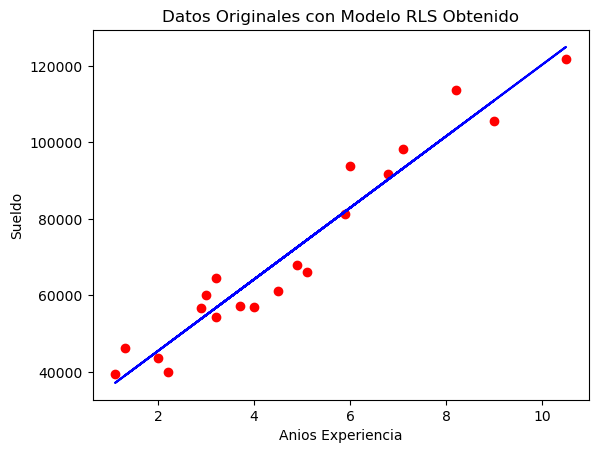

In [23]:
#Visualizar los resultados de Entrenamiento
plt.scatter(X_train, y_train, color = "red") #Muestra los datos originales
plt.plot(X_train, regression.predict(X_train), color = "blue") #Dibujar la linea recta
plt.title("Datos Originales con Modelo RLS Obtenido")
plt.xlabel("Anios Experiencia")
plt.ylabel("Sueldo")
plt.show()

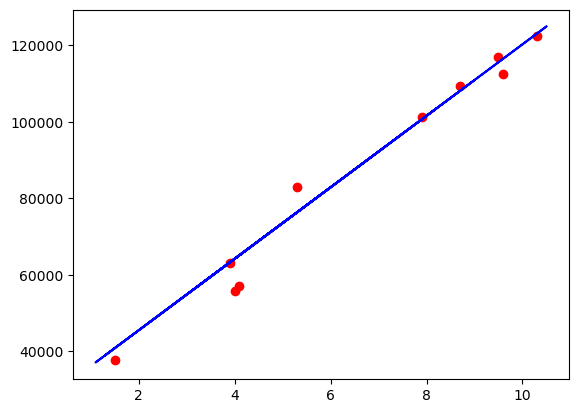

In [24]:
#Visualizar los resultados del Conjunto de Test
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")